c:\Users\arthu\miniconda3\envs\finesse\lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\arthu\miniconda3\envs\finesse\lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


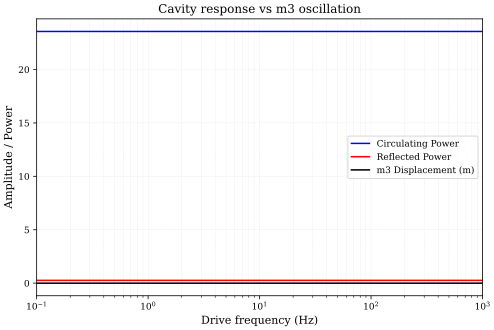

[23.56004994 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994
 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994
 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994
 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994
 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994
 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994
 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994
 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994
 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994
 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994
 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994
 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994
 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994 23.56004994
 23.56004994 23.56004994 23.56004994 23.56004994 23

In [48]:
import finesse
import matplotlib.pyplot as plt
import numpy as np

# Initialize Finesse plotting
finesse.init_plotting()

# Create the model
kat = finesse.Model()

kat.parse("""
# Laser at reference frequency
l L0 P=1 f=0
          
# Space attaching L0 <-> m1
s s0 L0.p1 m1.p1

# Input mirror
m m1 R=0.99 T=0.01 phi=0

# Intra-cavity space and middle mirror
s CAV m1.p2 m2.p1 L=1
m m2 R=0.991 T=0.009 phi=0

# Extra space and end mirror m3
s CAV2 m2.p2 m3.p1 L=0.13
m m3 R=0.3 T=0.7 phi=0   # now reflective to make it part of cavity

# Detectors
pd circ m1.p2.i   # circulating power
pd refl m1.p1.o   # reflected power

# Attach mechanical DOF to m3
pendulum sus3 m3.mech mass=1 fz=1 Qz=1000

# Monitor mirror displacement
xd m3_z m3.mech.z

# Define signal frequency
fsig(100)

# Drive the mechanical DOF with a small amplitude (1e-9 m)
sgen sig m3.mech.z 1e-9
""")

# Initialize fsig to a float
kat.fsig.f = 1.0  # Hz

# Sweep the drive frequency from 0.1 Hz to 1000 Hz
out = kat.run("xaxis(fsig, log, 0.1, 1000, 400)")

# Convert outputs to NumPy arrays
x = np.array(out.x).flatten()        # drive frequency in Hz
y_circ = np.array(out['circ'])       # circulating power
y_refl = np.array(out['refl'])       # reflected power
y_m3 = np.array(out['m3_z'])         # mirror displacement amplitude

# Plot circulating power, reflected power, and mirror displacement
plt.figure(figsize=(8,5))
plt.semilogx(x, y_circ, label="Circulating Power")
plt.semilogx(x, y_refl, label="Reflected Power")
plt.semilogx(x, y_m3, label="m3 Displacement (m)")
plt.xlabel("Drive frequency (Hz)")
plt.ylabel("Amplitude / Power")
plt.title("Cavity response vs m3 oscillation")
plt.grid(True, which="both", ls=":")
plt.legend()

# Optionally set y-limits for clarity
#plt.ylim([0, np.max(y_circ)*1.2])

plt.show()

# Print circulating power for inspection
print(y_circ)
